In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import multiprocessing as mul
from scipy import stats
import pickle
from scipy.integrate import quad
from corner import corner
import pandas as pd
from scipy.stats import gaussian_kde
import dynesty as dyn

In [2]:
GRBs = ['GRB210619B', 'GRB210610B', 'GRB210204A', 'GRB201216C', 'GRB200829A', 'GRB200613A', 'GRB190114C', 'GRB180720B', 'GRB180703A', 'GRB171010A', 'GRB160625B', 'GRB160509A', 'GRB150821A', 'GRB150514A', 'GRB150403A', 'GRB150314A', 'GRB141028A', 'GRB140508A', 'GRB140206A', 'GRB131231A', 'GRB131108A', 'GRB130925A', 'GRB130518A','GRB130427A', 'GRB120119A', 'GRB100728A', 'GRB091003A', 'GRB090926A', 'GRB090618', 'GRB090328', 'GRB081221', 'GRB080916C']

In [3]:
arr = [i.replace('_results.txt', '') for i in os.listdir('./outputs/BF_xerr/') if i.endswith('.txt')]

In [4]:
arr.sort( reverse=True)
GRBs.sort(reverse=True)

In [5]:
for i in range(len(GRBs)):
    if GRBs[i] not in arr:
        print(GRBs[i])

In [ ]:

err_grb = GRBs
grbparam = pd.read_csv(os.getcwd() + '/../data/GRBPARAM.csv', index_col=0)
# for grb in err_grb:
    
    
#     grbname = grb + '.txt'
#     grbname_wtht_ext = grbname.replace('.txt','')


#     arr = np.loadtxt(os.getcwd() + '/asciidataof_fig1/32lag/'+grbname)
#     data = [arr[:,0], arr[:,1], arr[:,2]]
#     x = arr[:,0]
#     y = arr[:,1]
#     yerr = arr[:,2]

#     #Properties of GRB
#     E0 = grbparam[grbname.replace('.txt','')].E0
#     E0rest = E0
#     Erest = arr[:,0]    #in keV
#     z_com = grbparam[grbname.replace('.txt','')].redshift #redshift
#     H0=67.36 #Hubble constant km -1 Mpc s -1
#     omega_m = 0.315
#     omega_l = 1 - omega_m
#     grb
#     #MODELS

#     #NULL model
#     def nullhp(E, alpha, tau):
#         return (1 + z_com)*(tau * ((E ** alpha) - (E0 ** alpha)))
        


#     def int_z(z_prime, n):
#         integ_fn = lambda z: (1+z)**n / np.sqrt(omega_m * (1+z)**3 + omega_l)
#         return quad( integ_fn, a=0, b=z_prime)[0]

#     int_z1 = np.asarray(int_z(z_com, 1))
#     int_z2 = np.asarray(int_z(z_com, 2))

#     #LINEAR model
#     def linearhp(E, logEqg, alpha, tau):
        
#         e0qg = (E - E0) / (10 ** logEqg)
        
#         return (e0qg * int_z1)/H0 + nullhp(E, alpha, tau)

#     #QUADRATIC model
#     def quadhp(E, logEqg, alpha, tau):
#         e0qg = (E**2 - E0 **2) / ((10 ** logEqg)**2)
        
#         return 1.5 * (e0qg * int_z2)/H0 + nullhp(E, alpha, tau)
#     #LOG-LIKELIHOODS
#     def loglike_null(theta):
#         alpha, tau = theta
        
        
#         model = nullhp(x,  alpha, tau)
        
#         return sum(stats.norm.logpdf(*args) for args in zip(y,model,yerr))
        
        

#     def loglike_linear(theta):
#         logEqg, alpha, tau = theta
        
#         model = linearhp(x, logEqg, alpha, tau)
        
#         return sum(stats.norm.logpdf(*args) for args in zip(y,model,yerr))

#     def loglike_quad(theta):
#         logEqg, alpha, tau = theta
        
#         model = quadhp(x, logEqg, alpha, tau)
        
#         return sum(stats.norm.logpdf(*args) for args in zip(y,model,yerr))


#     alphamin = -1
#     alphamax = 1
#     taumin = -10
#     taumax = 10
#     logeqmin = 6
#     logeqmax = 19
#     #PRIOR DISTRIBUTIONS

#     def prior_transform_null(theta):
#         alpha, tau = theta
#         return [(alphamax - alphamin) * alpha + alphamin, (taumax - taumin) * tau + taumin]

#     def prior_transform_linear(theta):
#         logEqg, alpha, tau = theta
#         return [(logeqmax - logeqmin) * logEqg + logeqmin, (alphamax - alphamin) * alpha + alphamin, (taumax - taumin) * tau + taumin]

#     def prior_transform_quadratic(theta):
#         logEqg, alpha, tau = theta
#         return [(logeqmax - logeqmin) * logEqg + logeqmin, (alphamax - alphamin) * alpha + alphamin, (taumax - taumin) * tau + taumin]

#     #Properties of GRB
#     E0 = grbparam[grbname.replace('.txt','')].E0
#     E0rest = E0
#     Erest = arr[:,0]    #in keV
#     z_com = grbparam[grbname.replace('.txt','')].redshift #redshift
#     threesamplers = ['_null_sampler.pkl', '_linear_sampler.pkl', '_quadratic_sampler.pkl']
#     sampler0 = dyn.utils.restore_sampler('./outputs/sampler_saves/' + grb + threesamplers[0])
#     sampler1 = dyn.utils.restore_sampler('./outputs/sampler_saves/' + grb + threesamplers[1])
#     sampler2 = dyn.utils.restore_sampler('./outputs/sampler_saves/' + grb + threesamplers[2])
#     results0 = sampler0.results
#     results1 = sampler1.results
#     results2 = sampler2.results
#     with open('outputs/BF/' + grb + '_results.txt', 'w') as f:
#         f.write(str(results0.logz[-1]) + ',' + str(results0.logzerr[-1]) + '\n')
#         f.write(str(results1.logz[-1]) + ',' + str(results1.logzerr[-1]) + '\n')
#         f.write(str(results2.logz[-1]) + ',' + str(results2.logzerr[-1]) + '\n')

In [3]:
data = []
for grb in GRBs:
    temp = np.loadtxt('./outputs/BF_xerr/' + grb + '_results.txt', delimiter=',')[:,0]
    # data.append( [grb, grbparam[grb].E0, grbparam[grb].redshift, *np.exp(temp - temp[0])]  )
    data.append( [grb, grbparam[grb].E0, grbparam[grb].redshift, *(temp - temp[0])]  )
    # data.append( [grb, grbparam[grb].E0, grbparam[grb].redshift, *temp]  )

In [4]:
df = pd.DataFrame(data, columns=['GRB', 'E0 (keV)', 'redshift', 'null', 'linear', 'quadratic']).sort_values('GRB', ascending=False).reset_index(drop=True)

# df.to_latex('./outputs/BE/BE_table.txt', index=False, float_format="%.2f")
# df

In [5]:
df

,GRB,E0 (keV),redshift,null,linear,quadratic
0,GRB210619B,10.0,1.9370,0.0,-3.343831,-0.477967
1,GRB210610B,30.0,1.1300,0.0,4.378366,-0.522777
2,GRB210204A,10.0,0.8760,0.0,-1.659043,-0.440357
3,GRB201216C,15.0,1.1000,0.0,-1.420041,-0.475879
4,GRB200829A,25.0,1.2500,0.0,-2.324462,-0.467106
5,GRB200613A,30.0,1.2200,0.0,-1.459558,-0.273654
6,GRB190114C,10.0,0.4250,0.0,-2.168844,-0.511376
7,GRB180720B,25.0,0.6540,0.0,-1.517538,-0.247606
8,GRB180703A,20.0,0.6678,0.0,-1.327956,-0.331975
9,GRB171010A,10.0,0.3285,0.0,-1.724562,-0.475683


In [6]:
data = []
for i in os.listdir('./outputs/GOF/'):
    # with open('./outputs/GOF/' + i, 'rb') as f:
    #     data.append(np.load(f))
    if i.endswith('_GOF.txt'):
        data.append([i.replace('_GOF.txt', ''), *np.loadtxt('./outputs/GOF_xerr/' + i)])
df2 = pd.DataFrame(data, columns=['GRB2', 'Null', 'Linear', 'Quadratic'])
# df2.index = df2['GRB']

df2.sort_values('GRB2', inplace=True, ascending=False)
df2.reset_index(drop=True, inplace=True)
# df2.drop('GRB', axis=1, inplace=True)

In [7]:
df2

,GRB2,Null,Linear,Quadratic
0,GRB210619B,8.548766,9.052742,9.087015
1,GRB210610B,13.292684,13.097275,14.044281
2,GRB210204A,12.036495,12.824970,12.656139
3,GRB201216C,1.164044,1.250565,1.276322
4,GRB200829A,24.286973,25.557712,25.759029
5,GRB200613A,0.747919,0.902978,0.677608
6,GRB190114C,21.898596,23.188501,23.189422
7,GRB180720B,2.364945,2.600112,2.793043
8,GRB180703A,12.703080,13.634794,13.681013
9,GRB171010A,3.261517,3.031594,3.096805


In [8]:
final = pd.concat([df, df2], axis=1).drop('GRB2', axis=1)#.to_latex('./outputs/table.txt', index=False, float_format="%.2f")

In [9]:
final = final[['GRB', 'E0 (keV)', 'redshift', 'null', 'Null', 'linear', 'Linear', 'quadratic', 'Quadratic']]

In [10]:
final

,GRB,E0 (keV),redshift,null,Null,linear,Linear,quadratic,Quadratic
0,GRB210619B,10.0,1.9370,0.0,8.548766,-3.343831,9.052742,-0.477967,9.087015
1,GRB210610B,30.0,1.1300,0.0,13.292684,4.378366,13.097275,-0.522777,14.044281
2,GRB210204A,10.0,0.8760,0.0,12.036495,-1.659043,12.824970,-0.440357,12.656139
3,GRB201216C,15.0,1.1000,0.0,1.164044,-1.420041,1.250565,-0.475879,1.276322
4,GRB200829A,25.0,1.2500,0.0,24.286973,-2.324462,25.557712,-0.467106,25.759029
5,GRB200613A,30.0,1.2200,0.0,0.747919,-1.459558,0.902978,-0.273654,0.677608
6,GRB190114C,10.0,0.4250,0.0,21.898596,-2.168844,23.188501,-0.511376,23.189422
7,GRB180720B,25.0,0.6540,0.0,2.364945,-1.517538,2.600112,-0.247606,2.793043
8,GRB180703A,20.0,0.6678,0.0,12.703080,-1.327956,13.634794,-0.331975,13.681013
9,GRB171010A,10.0,0.3285,0.0,3.261517,-1.724562,3.031594,-0.475683,3.096805


In [11]:
final['null'] = final['null'].round(1)
final['Null'] = final['Null'].round(1)
final['linear'] = final['linear'].round(1)
final['Linear'] = final['Linear'].round(1)
final['quadratic'] = final['quadratic'].round(1)
final['Quadratic'] = final['Quadratic'].round(1)

In [12]:
final

,GRB,E0 (keV),redshift,null,Null,linear,Linear,quadratic,Quadratic
0,GRB210619B,10.0,1.9370,0.0,8.5,-3.3,9.1,-0.5,9.1
1,GRB210610B,30.0,1.1300,0.0,13.3,4.4,13.1,-0.5,14.0
2,GRB210204A,10.0,0.8760,0.0,12.0,-1.7,12.8,-0.4,12.7
3,GRB201216C,15.0,1.1000,0.0,1.2,-1.4,1.3,-0.5,1.3
4,GRB200829A,25.0,1.2500,0.0,24.3,-2.3,25.6,-0.5,25.8
5,GRB200613A,30.0,1.2200,0.0,0.7,-1.5,0.9,-0.3,0.7
6,GRB190114C,10.0,0.4250,0.0,21.9,-2.2,23.2,-0.5,23.2
7,GRB180720B,25.0,0.6540,0.0,2.4,-1.5,2.6,-0.2,2.8
8,GRB180703A,20.0,0.6678,0.0,12.7,-1.3,13.6,-0.3,13.7
9,GRB171010A,10.0,0.3285,0.0,3.3,-1.7,3.0,-0.5,3.1


In [13]:
final.to_latex('./outputs/table_xerr.tex', index=False, float_format="%.2f")

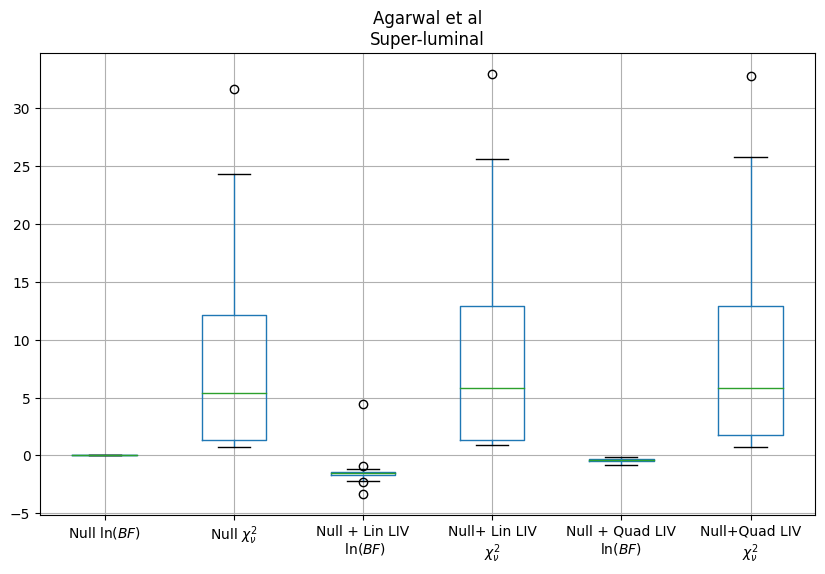

In [14]:
plt.figure(figsize=(10, 6))
temp= final.drop(['GRB', 'E0 (keV)', 'redshift'], inplace=False, axis=1)
temp.columns = ['Null $\ln(BF)$', 'Null $\chi^2_{\\nu}$', 'Null + Lin LIV\n $\ln(BF)$', 'Null+ Lin LIV\n$\chi^2_{\\nu}$', 'Null + Quad LIV\n$\ln(BF)$', 'Null+Quad LIV\n$\chi^2_{\\nu}$']

temp.boxplot()
# plt.yticks
plt.title('Agarwal et al\nSuper-luminal')
# plt.ylim(-20, 20)
plt.show()